# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached tensorflow_gpu-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached opencv_python-4.5.5.62-cp36-abi3-win_amd64.whl (35.4 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\six.cpython-39.pyc'
Consider using the `--user` option or check the permissions.



  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:


In [26]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [27]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [28]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [29]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [30]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [31]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [32]:
draw_landmarks(frame, results)

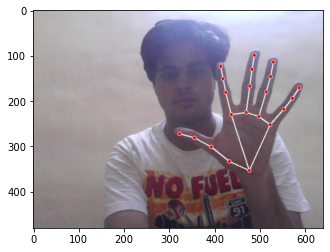

In [33]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [34]:
len(results.left_hand_landmarks.landmark)

21

In [35]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [36]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [37]:
result_test = extract_keypoints(results)

In [38]:
result_test

array([ 7.46181488e-01,  7.36956596e-01,  6.05440903e-07,  6.76923990e-01,
        6.94947422e-01, -3.27582993e-02,  6.14445448e-01,  6.28432155e-01,
       -5.37392721e-02,  5.57233691e-01,  5.86269855e-01, -7.29801133e-02,
        5.05630434e-01,  5.67661881e-01, -9.34952945e-02,  6.84308589e-01,
        4.80162948e-01, -3.32088023e-02,  6.64958060e-01,  3.78296375e-01,
       -5.47339097e-02,  6.54765666e-01,  3.14760894e-01, -7.29268640e-02,
        6.47845149e-01,  2.59206474e-01, -8.75676498e-02,  7.34730542e-01,
        4.70163971e-01, -3.84215675e-02,  7.47513592e-01,  3.48299026e-01,
       -5.62537462e-02,  7.55989969e-01,  2.71881968e-01, -7.26423636e-02,
        7.63045847e-01,  2.07043082e-01, -8.61857161e-02,  7.78725922e-01,
        4.87703949e-01, -4.83884700e-02,  8.04510593e-01,  3.75737756e-01,
       -7.25546032e-02,  8.19275916e-01,  3.04479182e-01, -9.21917483e-02,
        8.29246759e-01,  2.38827676e-01, -1.06582738e-01,  8.18021953e-01,
        5.25407374e-01, -

In [39]:
np.save('0', result_test)

In [40]:
np.load('0.npy')

array([ 7.46181488e-01,  7.36956596e-01,  6.05440903e-07,  6.76923990e-01,
        6.94947422e-01, -3.27582993e-02,  6.14445448e-01,  6.28432155e-01,
       -5.37392721e-02,  5.57233691e-01,  5.86269855e-01, -7.29801133e-02,
        5.05630434e-01,  5.67661881e-01, -9.34952945e-02,  6.84308589e-01,
        4.80162948e-01, -3.32088023e-02,  6.64958060e-01,  3.78296375e-01,
       -5.47339097e-02,  6.54765666e-01,  3.14760894e-01, -7.29268640e-02,
        6.47845149e-01,  2.59206474e-01, -8.75676498e-02,  7.34730542e-01,
        4.70163971e-01, -3.84215675e-02,  7.47513592e-01,  3.48299026e-01,
       -5.62537462e-02,  7.55989969e-01,  2.71881968e-01, -7.26423636e-02,
        7.63045847e-01,  2.07043082e-01, -8.61857161e-02,  7.78725922e-01,
        4.87703949e-01, -4.83884700e-02,  8.04510593e-01,  3.75737756e-01,
       -7.25546032e-02,  8.19275916e-01,  3.04479182e-01, -9.21917483e-02,
        8.29246759e-01,  2.38827676e-01, -1.06582738e-01,  8.18021953e-01,
        5.25407374e-01, -

# 4. Setup Folders for Collection

In [41]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['accident', 'ambulance', 'breathe','emergency', 'fire', 'help'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [42]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [43]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [44]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [45]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [48]:
label_map = {label:num for num, label in enumerate(actions)}

In [49]:
label_map

{'accident': 0,
 'ambulance': 1,
 'breathe': 2,
 'emergency': 3,
 'fire': 4,
 'help': 5}

In [50]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [51]:
np.array(sequences).shape

(180, 30, 126)

In [52]:
np.array(labels).shape

(180,)

In [53]:
X = np.array(sequences)

In [54]:
X.shape

(180, 30, 126)

In [55]:
y = to_categorical(labels).astype(int)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [57]:
y_test.shape

(9, 6)

# 7. Build and Train LSTM Neural Network

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [59]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [60]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [61]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=5000, callbacks=[tb_callback])

Epoch 1/5000
6/6 [==============================] - 4s 54ms/step - loss: 1.7871 - categorical_accuracy: 0.1462
Epoch 2/5000
6/6 [==============================] - 0s 57ms/step - loss: 1.7340 - categorical_accuracy: 0.2865
Epoch 3/5000
6/6 [==============================] - 0s 56ms/step - loss: 1.5447 - categorical_accuracy: 0.4912
Epoch 4/5000
6/6 [==============================] - 0s 56ms/step - loss: 1.4213 - categorical_accuracy: 0.5322
Epoch 5/5000
6/6 [==============================] - 0s 56ms/step - loss: 1.4003 - categorical_accuracy: 0.4678
Epoch 6/5000
6/6 [==============================] - 0s 58ms/step - loss: 1.3686 - categorical_accuracy: 0.4444
Epoch 7/5000
6/6 [==============================] - 0s 57ms/step - loss: 1.3411 - categorical_accuracy: 0.4678
Epoch 8/5000
6/6 [==============================] - 0s 56ms/step - loss: 1.1915 - categorical_accuracy: 0.5146
Epoch 9/5000
6/6 [==============================] - 0s 59ms/step - loss: 1.2358 - categorical_accuracy: 0.6023
E

6/6 [==============================] - 0s 67ms/step - loss: 0.3616 - categorical_accuracy: 0.9064
Epoch 75/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.3901 - categorical_accuracy: 0.8772
Epoch 76/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.2963 - categorical_accuracy: 0.9181
Epoch 77/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.2638 - categorical_accuracy: 0.9357
Epoch 78/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.2525 - categorical_accuracy: 0.9298
Epoch 79/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.2508 - categorical_accuracy: 0.9181
Epoch 80/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.2442 - categorical_accuracy: 0.9298
Epoch 81/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.2906 - categorical_accuracy: 0.9064
Epoch 82/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.3291 - categorical_accuracy: 0.8889
Epoch 

6/6 [==============================] - 0s 66ms/step - loss: 0.4560 - categorical_accuracy: 0.8246
Epoch 147/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.4633 - categorical_accuracy: 0.8129
Epoch 148/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.4406 - categorical_accuracy: 0.8421
Epoch 149/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.3934 - categorical_accuracy: 0.8538
Epoch 150/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.3788 - categorical_accuracy: 0.8480
Epoch 151/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.3598 - categorical_accuracy: 0.8304
Epoch 152/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.3360 - categorical_accuracy: 0.8480
Epoch 153/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.3146 - categorical_accuracy: 0.8772
Epoch 154/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.3018 - categorical_accuracy: 0.877

6/6 [==============================] - 0s 65ms/step - loss: 0.1054 - categorical_accuracy: 0.9708
Epoch 219/5000
6/6 [==============================] - 0s 68ms/step - loss: 0.1518 - categorical_accuracy: 0.9649
Epoch 220/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.2133 - categorical_accuracy: 0.9591
Epoch 221/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.1443 - categorical_accuracy: 0.9649
Epoch 222/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.0980 - categorical_accuracy: 0.9766
Epoch 223/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0878 - categorical_accuracy: 0.9883
Epoch 224/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0926 - categorical_accuracy: 0.9825
Epoch 225/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.1858 - categorical_accuracy: 0.9532
Epoch 226/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.1461 - categorical_accuracy: 0.959

6/6 [==============================] - 0s 75ms/step - loss: 0.0215 - categorical_accuracy: 1.0000
Epoch 291/5000
6/6 [==============================] - 0s 71ms/step - loss: 0.0160 - categorical_accuracy: 1.0000
Epoch 292/5000
6/6 [==============================] - 0s 70ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 293/5000
6/6 [==============================] - 0s 70ms/step - loss: 0.0136 - categorical_accuracy: 1.0000
Epoch 294/5000
6/6 [==============================] - 0s 67ms/step - loss: 0.0120 - categorical_accuracy: 1.0000
Epoch 295/5000
6/6 [==============================] - 0s 69ms/step - loss: 0.0111 - categorical_accuracy: 1.0000
Epoch 296/5000
6/6 [==============================] - 0s 69ms/step - loss: 0.0104 - categorical_accuracy: 1.0000
Epoch 297/5000
6/6 [==============================] - 0s 68ms/step - loss: 0.0099 - categorical_accuracy: 1.0000
Epoch 298/5000
6/6 [==============================] - 0s 68ms/step - loss: 0.0094 - categorical_accuracy: 1.000

6/6 [==============================] - 0s 73ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 363/5000
6/6 [==============================] - 0s 67ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 364/5000
6/6 [==============================] - 0s 67ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 365/5000
6/6 [==============================] - 0s 67ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 366/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 367/5000
6/6 [==============================] - 0s 68ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 368/5000
6/6 [==============================] - 0s 68ms/step - loss: 9.7084e-04 - categorical_accuracy: 1.0000
Epoch 369/5000
6/6 [==============================] - 0s 67ms/step - loss: 9.3902e-04 - categorical_accuracy: 1.0000
Epoch 370/5000
6/6 [==============================] - 0s 68ms/step - loss: 9.4339e-04 - categorical_acc

6/6 [==============================] - 0s 79ms/step - loss: 3.5511e-04 - categorical_accuracy: 1.0000
Epoch 433/5000
6/6 [==============================] - 0s 76ms/step - loss: 3.5091e-04 - categorical_accuracy: 1.0000
Epoch 434/5000
6/6 [==============================] - 0s 75ms/step - loss: 3.4686e-04 - categorical_accuracy: 1.0000
Epoch 435/5000
6/6 [==============================] - 0s 76ms/step - loss: 3.4420e-04 - categorical_accuracy: 1.0000
Epoch 436/5000
6/6 [==============================] - 0s 76ms/step - loss: 3.3898e-04 - categorical_accuracy: 1.0000
Epoch 437/5000
6/6 [==============================] - 0s 76ms/step - loss: 3.3482e-04 - categorical_accuracy: 1.0000
Epoch 438/5000
6/6 [==============================] - 0s 78ms/step - loss: 3.3021e-04 - categorical_accuracy: 1.0000
Epoch 439/5000
6/6 [==============================] - 0s 76ms/step - loss: 3.2659e-04 - categorical_accuracy: 1.0000
Epoch 440/5000
6/6 [==============================] - 0s 78ms/step - loss: 3.22

6/6 [==============================] - 0s 67ms/step - loss: 1.7127e-04 - categorical_accuracy: 1.0000
Epoch 503/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.6959e-04 - categorical_accuracy: 1.0000
Epoch 504/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.6855e-04 - categorical_accuracy: 1.0000
Epoch 505/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.6738e-04 - categorical_accuracy: 1.0000
Epoch 506/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.6567e-04 - categorical_accuracy: 1.0000
Epoch 507/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.6409e-04 - categorical_accuracy: 1.0000
Epoch 508/5000
6/6 [==============================] - 0s 68ms/step - loss: 1.6289e-04 - categorical_accuracy: 1.0000
Epoch 509/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.6179e-04 - categorical_accuracy: 1.0000
Epoch 510/5000
6/6 [==============================] - 0s 69ms/step - loss: 1.59

6/6 [==============================] - 0s 69ms/step - loss: 9.9231e-05 - categorical_accuracy: 1.0000
Epoch 573/5000
6/6 [==============================] - 0s 66ms/step - loss: 9.8540e-05 - categorical_accuracy: 1.0000
Epoch 574/5000
6/6 [==============================] - 0s 67ms/step - loss: 9.8081e-05 - categorical_accuracy: 1.0000
Epoch 575/5000
6/6 [==============================] - 0s 67ms/step - loss: 9.7282e-05 - categorical_accuracy: 1.0000
Epoch 576/5000
6/6 [==============================] - 0s 66ms/step - loss: 9.6753e-05 - categorical_accuracy: 1.0000
Epoch 577/5000
6/6 [==============================] - 0s 68ms/step - loss: 9.6110e-05 - categorical_accuracy: 1.0000
Epoch 578/5000
6/6 [==============================] - 0s 67ms/step - loss: 9.5415e-05 - categorical_accuracy: 1.0000
Epoch 579/5000
6/6 [==============================] - 0s 69ms/step - loss: 9.4463e-05 - categorical_accuracy: 1.0000
Epoch 580/5000
6/6 [==============================] - 0s 68ms/step - loss: 9.38

6/6 [==============================] - 0s 67ms/step - loss: 6.2764e-05 - categorical_accuracy: 1.0000
Epoch 643/5000
6/6 [==============================] - 0s 67ms/step - loss: 6.2377e-05 - categorical_accuracy: 1.0000
Epoch 644/5000
6/6 [==============================] - 0s 66ms/step - loss: 6.1911e-05 - categorical_accuracy: 1.0000
Epoch 645/5000
6/6 [==============================] - 0s 66ms/step - loss: 6.1612e-05 - categorical_accuracy: 1.0000
Epoch 646/5000
6/6 [==============================] - 0s 69ms/step - loss: 6.1187e-05 - categorical_accuracy: 1.0000
Epoch 647/5000
6/6 [==============================] - 0s 67ms/step - loss: 6.0897e-05 - categorical_accuracy: 1.0000
Epoch 648/5000
6/6 [==============================] - 0s 67ms/step - loss: 6.0542e-05 - categorical_accuracy: 1.0000
Epoch 649/5000
6/6 [==============================] - 0s 66ms/step - loss: 6.0172e-05 - categorical_accuracy: 1.0000
Epoch 650/5000
6/6 [==============================] - 0s 67ms/step - loss: 5.97

6/6 [==============================] - 0s 69ms/step - loss: 4.2026e-05 - categorical_accuracy: 1.0000
Epoch 713/5000
6/6 [==============================] - 0s 67ms/step - loss: 4.1777e-05 - categorical_accuracy: 1.0000
Epoch 714/5000
6/6 [==============================] - 0s 67ms/step - loss: 4.1526e-05 - categorical_accuracy: 1.0000
Epoch 715/5000
6/6 [==============================] - 0s 67ms/step - loss: 4.1225e-05 - categorical_accuracy: 1.0000
Epoch 716/5000
6/6 [==============================] - 0s 68ms/step - loss: 4.1069e-05 - categorical_accuracy: 1.0000
Epoch 717/5000
6/6 [==============================] - 0s 67ms/step - loss: 4.0890e-05 - categorical_accuracy: 1.0000
Epoch 718/5000
6/6 [==============================] - 0s 66ms/step - loss: 4.0626e-05 - categorical_accuracy: 1.0000
Epoch 719/5000
6/6 [==============================] - 0s 68ms/step - loss: 4.0428e-05 - categorical_accuracy: 1.0000
Epoch 720/5000
6/6 [==============================] - 0s 67ms/step - loss: 4.01

6/6 [==============================] - 0s 67ms/step - loss: 2.5737e-05 - categorical_accuracy: 1.0000
Epoch 783/5000
6/6 [==============================] - 0s 67ms/step - loss: 2.5583e-05 - categorical_accuracy: 1.0000
Epoch 784/5000
6/6 [==============================] - 0s 67ms/step - loss: 2.5410e-05 - categorical_accuracy: 1.0000
Epoch 785/5000
6/6 [==============================] - 0s 68ms/step - loss: 2.5305e-05 - categorical_accuracy: 1.0000
Epoch 786/5000
6/6 [==============================] - 0s 67ms/step - loss: 2.5100e-05 - categorical_accuracy: 1.0000
Epoch 787/5000
6/6 [==============================] - 0s 67ms/step - loss: 2.4992e-05 - categorical_accuracy: 1.0000
Epoch 788/5000
6/6 [==============================] - 0s 68ms/step - loss: 2.4803e-05 - categorical_accuracy: 1.0000
Epoch 789/5000
6/6 [==============================] - 0s 68ms/step - loss: 2.4719e-05 - categorical_accuracy: 1.0000
Epoch 790/5000
6/6 [==============================] - 0s 68ms/step - loss: 2.44

6/6 [==============================] - 0s 68ms/step - loss: 1.7015e-05 - categorical_accuracy: 1.0000
Epoch 853/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.6941e-05 - categorical_accuracy: 1.0000
Epoch 854/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.6806e-05 - categorical_accuracy: 1.0000
Epoch 855/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.6743e-05 - categorical_accuracy: 1.0000
Epoch 856/5000
6/6 [==============================] - 0s 68ms/step - loss: 1.6651e-05 - categorical_accuracy: 1.0000
Epoch 857/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.6556e-05 - categorical_accuracy: 1.0000
Epoch 858/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.6481e-05 - categorical_accuracy: 1.0000
Epoch 859/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.6365e-05 - categorical_accuracy: 1.0000
Epoch 860/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.62

6/6 [==============================] - 0s 67ms/step - loss: 1.1886e-05 - categorical_accuracy: 1.0000
Epoch 923/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.1833e-05 - categorical_accuracy: 1.0000
Epoch 924/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.1780e-05 - categorical_accuracy: 1.0000
Epoch 925/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.1720e-05 - categorical_accuracy: 1.0000
Epoch 926/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.1661e-05 - categorical_accuracy: 1.0000
Epoch 927/5000
6/6 [==============================] - 0s 68ms/step - loss: 1.1598e-05 - categorical_accuracy: 1.0000
Epoch 928/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.1556e-05 - categorical_accuracy: 1.0000
Epoch 929/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.1495e-05 - categorical_accuracy: 1.0000
Epoch 930/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.14

6/6 [==============================] - 0s 65ms/step - loss: 8.5773e-06 - categorical_accuracy: 1.0000
Epoch 993/5000
6/6 [==============================] - 0s 64ms/step - loss: 8.5410e-06 - categorical_accuracy: 1.0000
Epoch 994/5000
6/6 [==============================] - 0s 62ms/step - loss: 8.4985e-06 - categorical_accuracy: 1.0000
Epoch 995/5000
6/6 [==============================] - 0s 63ms/step - loss: 8.4601e-06 - categorical_accuracy: 1.0000
Epoch 996/5000
6/6 [==============================] - 0s 64ms/step - loss: 8.4162e-06 - categorical_accuracy: 1.0000
Epoch 997/5000
6/6 [==============================] - 0s 63ms/step - loss: 8.3890e-06 - categorical_accuracy: 1.0000
Epoch 998/5000
6/6 [==============================] - 0s 66ms/step - loss: 8.3479e-06 - categorical_accuracy: 1.0000
Epoch 999/5000
6/6 [==============================] - 0s 63ms/step - loss: 8.3110e-06 - categorical_accuracy: 1.0000
Epoch 1000/5000
6/6 [==============================] - 0s 64ms/step - loss: 8.2

6/6 [==============================] - 0s 64ms/step - loss: 6.3905e-06 - categorical_accuracy: 1.0000
Epoch 1062/5000
6/6 [==============================] - 0s 62ms/step - loss: 6.3675e-06 - categorical_accuracy: 1.0000
Epoch 1063/5000
6/6 [==============================] - 0s 63ms/step - loss: 6.3445e-06 - categorical_accuracy: 1.0000
Epoch 1064/5000
6/6 [==============================] - 0s 62ms/step - loss: 6.3187e-06 - categorical_accuracy: 1.0000
Epoch 1065/5000
6/6 [==============================] - 0s 63ms/step - loss: 6.2936e-06 - categorical_accuracy: 1.0000
Epoch 1066/5000
6/6 [==============================] - 0s 61ms/step - loss: 6.2678e-06 - categorical_accuracy: 1.0000
Epoch 1067/5000
6/6 [==============================] - 0s 65ms/step - loss: 6.2406e-06 - categorical_accuracy: 1.0000
Epoch 1068/5000
6/6 [==============================] - 0s 69ms/step - loss: 6.2141e-06 - categorical_accuracy: 1.0000
Epoch 1069/5000
6/6 [==============================] - 0s 80ms/step - lo

6/6 [==============================] - 0s 58ms/step - loss: 4.8303e-06 - categorical_accuracy: 1.0000
Epoch 1131/5000
6/6 [==============================] - 0s 56ms/step - loss: 4.8164e-06 - categorical_accuracy: 1.0000
Epoch 1132/5000
6/6 [==============================] - 0s 56ms/step - loss: 4.7990e-06 - categorical_accuracy: 1.0000
Epoch 1133/5000
6/6 [==============================] - 0s 63ms/step - loss: 4.7801e-06 - categorical_accuracy: 1.0000
Epoch 1134/5000
6/6 [==============================] - 0s 64ms/step - loss: 4.7655e-06 - categorical_accuracy: 1.0000
Epoch 1135/5000
6/6 [==============================] - 0s 58ms/step - loss: 4.7460e-06 - categorical_accuracy: 1.0000
Epoch 1136/5000
6/6 [==============================] - 0s 58ms/step - loss: 4.7265e-06 - categorical_accuracy: 1.0000
Epoch 1137/5000
6/6 [==============================] - 0s 58ms/step - loss: 4.7070e-06 - categorical_accuracy: 1.0000
Epoch 1138/5000
6/6 [==============================] - 0s 58ms/step - lo

6/6 [==============================] - 0s 68ms/step - loss: 3.6738e-06 - categorical_accuracy: 1.0000
Epoch 1200/5000
6/6 [==============================] - 0s 64ms/step - loss: 3.6592e-06 - categorical_accuracy: 1.0000
Epoch 1201/5000
6/6 [==============================] - 0s 66ms/step - loss: 3.6418e-06 - categorical_accuracy: 1.0000
Epoch 1202/5000
6/6 [==============================] - 0s 60ms/step - loss: 3.6306e-06 - categorical_accuracy: 1.0000
Epoch 1203/5000
6/6 [==============================] - 0s 59ms/step - loss: 3.6181e-06 - categorical_accuracy: 1.0000
Epoch 1204/5000
6/6 [==============================] - 0s 85ms/step - loss: 3.6020e-06 - categorical_accuracy: 1.0000
Epoch 1205/5000
6/6 [==============================] - 0s 68ms/step - loss: 3.5867e-06 - categorical_accuracy: 1.0000
Epoch 1206/5000
6/6 [==============================] - 0s 69ms/step - loss: 3.5728e-06 - categorical_accuracy: 1.0000
Epoch 1207/5000
6/6 [==============================] - 1s 88ms/step - lo

6/6 [==============================] - 0s 83ms/step - loss: 2.8164e-06 - categorical_accuracy: 1.0000
Epoch 1269/5000
6/6 [==============================] - 0s 69ms/step - loss: 2.8073e-06 - categorical_accuracy: 1.0000
Epoch 1270/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.7955e-06 - categorical_accuracy: 1.0000
Epoch 1271/5000
6/6 [==============================] - 0s 60ms/step - loss: 2.7815e-06 - categorical_accuracy: 1.0000
Epoch 1272/5000
6/6 [==============================] - 0s 59ms/step - loss: 2.7759e-06 - categorical_accuracy: 1.0000
Epoch 1273/5000
6/6 [==============================] - 0s 60ms/step - loss: 2.7669e-06 - categorical_accuracy: 1.0000
Epoch 1274/5000
6/6 [==============================] - 0s 59ms/step - loss: 2.7578e-06 - categorical_accuracy: 1.0000
Epoch 1275/5000
6/6 [==============================] - 0s 58ms/step - loss: 2.7432e-06 - categorical_accuracy: 1.0000
Epoch 1276/5000
6/6 [==============================] - 0s 59ms/step - lo

6/6 [==============================] - 1s 93ms/step - loss: 2.1813e-06 - categorical_accuracy: 1.0000
Epoch 1338/5000
6/6 [==============================] - 0s 72ms/step - loss: 2.1695e-06 - categorical_accuracy: 1.0000
Epoch 1339/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.1667e-06 - categorical_accuracy: 1.0000
Epoch 1340/5000
6/6 [==============================] - 0s 68ms/step - loss: 2.1562e-06 - categorical_accuracy: 1.0000
Epoch 1341/5000
6/6 [==============================] - 1s 89ms/step - loss: 2.1444e-06 - categorical_accuracy: 1.0000
Epoch 1342/5000
6/6 [==============================] - 0s 78ms/step - loss: 2.1388e-06 - categorical_accuracy: 1.0000
Epoch 1343/5000
6/6 [==============================] - 1s 84ms/step - loss: 2.1311e-06 - categorical_accuracy: 1.0000
Epoch 1344/5000
6/6 [==============================] - 1s 101ms/step - loss: 2.1234e-06 - categorical_accuracy: 1.0000
Epoch 1345/5000
6/6 [==============================] - 1s 90ms/step - l

6/6 [==============================] - 0s 63ms/step - loss: 1.6989e-06 - categorical_accuracy: 1.0000
Epoch 1407/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.6919e-06 - categorical_accuracy: 1.0000
Epoch 1408/5000
6/6 [==============================] - 0s 68ms/step - loss: 1.6829e-06 - categorical_accuracy: 1.0000
Epoch 1409/5000
6/6 [==============================] - 0s 68ms/step - loss: 1.6780e-06 - categorical_accuracy: 1.0000
Epoch 1410/5000
6/6 [==============================] - 0s 70ms/step - loss: 1.6703e-06 - categorical_accuracy: 1.0000
Epoch 1411/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.6647e-06 - categorical_accuracy: 1.0000
Epoch 1412/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.6606e-06 - categorical_accuracy: 1.0000
Epoch 1413/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.6550e-06 - categorical_accuracy: 1.0000
Epoch 1414/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 77ms/step - loss: 1.3204e-06 - categorical_accuracy: 1.0000
Epoch 1476/5000
6/6 [==============================] - 0s 72ms/step - loss: 1.3162e-06 - categorical_accuracy: 1.0000
Epoch 1477/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.3092e-06 - categorical_accuracy: 1.0000
Epoch 1478/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.3029e-06 - categorical_accuracy: 1.0000
Epoch 1479/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.2994e-06 - categorical_accuracy: 1.0000
Epoch 1480/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.2960e-06 - categorical_accuracy: 1.0000
Epoch 1481/5000
6/6 [==============================] - 0s 74ms/step - loss: 1.2890e-06 - categorical_accuracy: 1.0000
Epoch 1482/5000
6/6 [==============================] - 0s 70ms/step - loss: 1.2855e-06 - categorical_accuracy: 1.0000
Epoch 1483/5000
6/6 [==============================] - 0s 66ms/step - lo

6/6 [==============================] - 0s 62ms/step - loss: 1.0317e-06 - categorical_accuracy: 1.0000
Epoch 1545/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.0290e-06 - categorical_accuracy: 1.0000
Epoch 1546/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.0227e-06 - categorical_accuracy: 1.0000
Epoch 1547/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.0192e-06 - categorical_accuracy: 1.0000
Epoch 1548/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.0136e-06 - categorical_accuracy: 1.0000
Epoch 1549/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.0115e-06 - categorical_accuracy: 1.0000
Epoch 1550/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.0087e-06 - categorical_accuracy: 1.0000
Epoch 1551/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.0067e-06 - categorical_accuracy: 1.0000
Epoch 1552/5000
6/6 [==============================] - 0s 60ms/step - lo

6/6 [==============================] - 0s 67ms/step - loss: 8.0588e-07 - categorical_accuracy: 1.0000
Epoch 1614/5000
6/6 [==============================] - 0s 64ms/step - loss: 7.9961e-07 - categorical_accuracy: 1.0000
Epoch 1615/5000
6/6 [==============================] - 0s 77ms/step - loss: 7.9682e-07 - categorical_accuracy: 1.0000
Epoch 1616/5000
6/6 [==============================] - 0s 80ms/step - loss: 7.9682e-07 - categorical_accuracy: 1.0000
Epoch 1617/5000
6/6 [==============================] - 1s 104ms/step - loss: 7.9333e-07 - categorical_accuracy: 1.0000
Epoch 1618/5000
6/6 [==============================] - 1s 89ms/step - loss: 7.8985e-07 - categorical_accuracy: 1.0000
Epoch 1619/5000
6/6 [==============================] - 0s 61ms/step - loss: 7.8636e-07 - categorical_accuracy: 1.0000
Epoch 1620/5000
6/6 [==============================] - 0s 58ms/step - loss: 7.8497e-07 - categorical_accuracy: 1.0000
Epoch 1621/5000
6/6 [==============================] - 0s 58ms/step - l

6/6 [==============================] - 0s 59ms/step - loss: 6.2114e-07 - categorical_accuracy: 1.0000
Epoch 1683/5000
6/6 [==============================] - 0s 59ms/step - loss: 6.2044e-07 - categorical_accuracy: 1.0000
Epoch 1684/5000
6/6 [==============================] - 0s 57ms/step - loss: 6.1905e-07 - categorical_accuracy: 1.0000
Epoch 1685/5000
6/6 [==============================] - 0s 59ms/step - loss: 6.1626e-07 - categorical_accuracy: 1.0000
Epoch 1686/5000
6/6 [==============================] - 0s 58ms/step - loss: 6.1417e-07 - categorical_accuracy: 1.0000
Epoch 1687/5000
6/6 [==============================] - 0s 58ms/step - loss: 6.1138e-07 - categorical_accuracy: 1.0000
Epoch 1688/5000
6/6 [==============================] - 0s 58ms/step - loss: 6.1069e-07 - categorical_accuracy: 1.0000
Epoch 1689/5000
6/6 [==============================] - 0s 57ms/step - loss: 6.0650e-07 - categorical_accuracy: 1.0000
Epoch 1690/5000
6/6 [==============================] - 0s 58ms/step - lo

6/6 [==============================] - 0s 57ms/step - loss: 4.8102e-07 - categorical_accuracy: 1.0000
Epoch 1752/5000
6/6 [==============================] - 0s 69ms/step - loss: 4.8032e-07 - categorical_accuracy: 1.0000
Epoch 1753/5000
6/6 [==============================] - 0s 71ms/step - loss: 4.7823e-07 - categorical_accuracy: 1.0000
Epoch 1754/5000
6/6 [==============================] - 1s 76ms/step - loss: 4.7265e-07 - categorical_accuracy: 1.0000
Epoch 1755/5000
6/6 [==============================] - 1s 92ms/step - loss: 4.7126e-07 - categorical_accuracy: 1.0000
Epoch 1756/5000
6/6 [==============================] - 0s 65ms/step - loss: 4.6987e-07 - categorical_accuracy: 1.0000
Epoch 1757/5000
6/6 [==============================] - 0s 66ms/step - loss: 4.6708e-07 - categorical_accuracy: 1.0000
Epoch 1758/5000
6/6 [==============================] - 0s 71ms/step - loss: 4.6777e-07 - categorical_accuracy: 1.0000
Epoch 1759/5000
6/6 [==============================] - 0s 82ms/step - lo

6/6 [==============================] - 0s 65ms/step - loss: 3.7157e-07 - categorical_accuracy: 1.0000
Epoch 1821/5000
6/6 [==============================] - 0s 64ms/step - loss: 3.6808e-07 - categorical_accuracy: 1.0000
Epoch 1822/5000
6/6 [==============================] - 0s 67ms/step - loss: 3.6739e-07 - categorical_accuracy: 1.0000
Epoch 1823/5000
6/6 [==============================] - 0s 72ms/step - loss: 3.6460e-07 - categorical_accuracy: 1.0000
Epoch 1824/5000
6/6 [==============================] - 0s 73ms/step - loss: 3.6460e-07 - categorical_accuracy: 1.0000
Epoch 1825/5000
6/6 [==============================] - 1s 138ms/step - loss: 3.6251e-07 - categorical_accuracy: 1.0000
Epoch 1826/5000
6/6 [==============================] - 1s 149ms/step - loss: 3.6042e-07 - categorical_accuracy: 1.0000
Epoch 1827/5000
6/6 [==============================] - 1s 107ms/step - loss: 3.5832e-07 - categorical_accuracy: 1.0000
Epoch 1828/5000
6/6 [==============================] - 1s 142ms/step 

6/6 [==============================] - 0s 66ms/step - loss: 2.8373e-07 - categorical_accuracy: 1.0000
Epoch 1890/5000
6/6 [==============================] - 0s 65ms/step - loss: 2.8094e-07 - categorical_accuracy: 1.0000
Epoch 1891/5000
6/6 [==============================] - 0s 65ms/step - loss: 2.7955e-07 - categorical_accuracy: 1.0000
Epoch 1892/5000
6/6 [==============================] - 0s 66ms/step - loss: 2.7815e-07 - categorical_accuracy: 1.0000
Epoch 1893/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.7815e-07 - categorical_accuracy: 1.0000
Epoch 1894/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.7955e-07 - categorical_accuracy: 1.0000
Epoch 1895/5000
6/6 [==============================] - 0s 65ms/step - loss: 2.7676e-07 - categorical_accuracy: 1.0000
Epoch 1896/5000
6/6 [==============================] - 0s 67ms/step - loss: 2.7746e-07 - categorical_accuracy: 1.0000
Epoch 1897/5000
6/6 [==============================] - 0s 67ms/step - lo

6/6 [==============================] - 0s 62ms/step - loss: 2.1960e-07 - categorical_accuracy: 1.0000
Epoch 1959/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.1960e-07 - categorical_accuracy: 1.0000
Epoch 1960/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.1890e-07 - categorical_accuracy: 1.0000
Epoch 1961/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.1820e-07 - categorical_accuracy: 1.0000
Epoch 1962/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.1820e-07 - categorical_accuracy: 1.0000
Epoch 1963/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.1611e-07 - categorical_accuracy: 1.0000
Epoch 1964/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.1541e-07 - categorical_accuracy: 1.0000
Epoch 1965/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.1332e-07 - categorical_accuracy: 1.0000
Epoch 1966/5000
6/6 [==============================] - 0s 61ms/step - lo

6/6 [==============================] - 0s 65ms/step - loss: 1.6313e-07 - categorical_accuracy: 1.0000
Epoch 2028/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.6383e-07 - categorical_accuracy: 1.0000
Epoch 2029/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.6243e-07 - categorical_accuracy: 1.0000
Epoch 2030/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.6173e-07 - categorical_accuracy: 1.0000
Epoch 2031/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.6034e-07 - categorical_accuracy: 1.0000
Epoch 2032/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.5964e-07 - categorical_accuracy: 1.0000
Epoch 2033/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.6104e-07 - categorical_accuracy: 1.0000
Epoch 2034/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.6104e-07 - categorical_accuracy: 1.0000
Epoch 2035/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 62ms/step - loss: 1.2339e-07 - categorical_accuracy: 1.0000
Epoch 2097/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.2130e-07 - categorical_accuracy: 1.0000
Epoch 2098/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.2060e-07 - categorical_accuracy: 1.0000
Epoch 2099/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.2130e-07 - categorical_accuracy: 1.0000
Epoch 2100/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.2130e-07 - categorical_accuracy: 1.0000
Epoch 2101/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.2060e-07 - categorical_accuracy: 1.0000
Epoch 2102/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.1991e-07 - categorical_accuracy: 1.0000
Epoch 2103/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.2060e-07 - categorical_accuracy: 1.0000
Epoch 2104/5000
6/6 [==============================] - 0s 62ms/step - lo

6/6 [==============================] - 0s 61ms/step - loss: 9.4810e-08 - categorical_accuracy: 1.0000
Epoch 2166/5000
6/6 [==============================] - 0s 61ms/step - loss: 9.4113e-08 - categorical_accuracy: 1.0000
Epoch 2167/5000
6/6 [==============================] - 0s 62ms/step - loss: 9.4113e-08 - categorical_accuracy: 1.0000
Epoch 2168/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.1324e-08 - categorical_accuracy: 1.0000
Epoch 2169/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.2021e-08 - categorical_accuracy: 1.0000
Epoch 2170/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.2021e-08 - categorical_accuracy: 1.0000
Epoch 2171/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.0627e-08 - categorical_accuracy: 1.0000
Epoch 2172/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.0627e-08 - categorical_accuracy: 1.0000
Epoch 2173/5000
6/6 [==============================] - 0s 61ms/step - lo

6/6 [==============================] - 0s 72ms/step - loss: 6.9713e-08 - categorical_accuracy: 1.0000
Epoch 2235/5000
6/6 [==============================] - 0s 67ms/step - loss: 6.8319e-08 - categorical_accuracy: 1.0000
Epoch 2236/5000
6/6 [==============================] - 0s 67ms/step - loss: 6.8319e-08 - categorical_accuracy: 1.0000
Epoch 2237/5000
6/6 [==============================] - 0s 63ms/step - loss: 6.6227e-08 - categorical_accuracy: 1.0000
Epoch 2238/5000
6/6 [==============================] - 0s 64ms/step - loss: 6.6227e-08 - categorical_accuracy: 1.0000
Epoch 2239/5000
6/6 [==============================] - 0s 75ms/step - loss: 6.4833e-08 - categorical_accuracy: 1.0000
Epoch 2240/5000
6/6 [==============================] - 0s 77ms/step - loss: 6.4833e-08 - categorical_accuracy: 1.0000
Epoch 2241/5000
6/6 [==============================] - 0s 72ms/step - loss: 6.6227e-08 - categorical_accuracy: 1.0000
Epoch 2242/5000
6/6 [==============================] - 0s 67ms/step - lo

6/6 [==============================] - 0s 64ms/step - loss: 4.6011e-08 - categorical_accuracy: 1.0000
Epoch 2304/5000
6/6 [==============================] - 0s 61ms/step - loss: 4.6011e-08 - categorical_accuracy: 1.0000
Epoch 2305/5000
6/6 [==============================] - 0s 62ms/step - loss: 4.6011e-08 - categorical_accuracy: 1.0000
Epoch 2306/5000
6/6 [==============================] - 0s 64ms/step - loss: 4.6011e-08 - categorical_accuracy: 1.0000
Epoch 2307/5000
6/6 [==============================] - 0s 63ms/step - loss: 4.6011e-08 - categorical_accuracy: 1.0000
Epoch 2308/5000
6/6 [==============================] - 0s 63ms/step - loss: 4.6011e-08 - categorical_accuracy: 1.0000
Epoch 2309/5000
6/6 [==============================] - 0s 64ms/step - loss: 4.6011e-08 - categorical_accuracy: 1.0000
Epoch 2310/5000
6/6 [==============================] - 0s 62ms/step - loss: 4.5313e-08 - categorical_accuracy: 1.0000
Epoch 2311/5000
6/6 [==============================] - 0s 64ms/step - lo

6/6 [==============================] - 0s 62ms/step - loss: 3.6251e-08 - categorical_accuracy: 1.0000
Epoch 2373/5000
6/6 [==============================] - 0s 60ms/step - loss: 3.4857e-08 - categorical_accuracy: 1.0000
Epoch 2374/5000
6/6 [==============================] - 0s 61ms/step - loss: 3.4857e-08 - categorical_accuracy: 1.0000
Epoch 2375/5000
6/6 [==============================] - 0s 61ms/step - loss: 3.4857e-08 - categorical_accuracy: 1.0000
Epoch 2376/5000
6/6 [==============================] - 0s 63ms/step - loss: 3.5554e-08 - categorical_accuracy: 1.0000
Epoch 2377/5000
6/6 [==============================] - 0s 63ms/step - loss: 3.5554e-08 - categorical_accuracy: 1.0000
Epoch 2378/5000
6/6 [==============================] - 0s 63ms/step - loss: 3.5554e-08 - categorical_accuracy: 1.0000
Epoch 2379/5000
6/6 [==============================] - 0s 63ms/step - loss: 3.4159e-08 - categorical_accuracy: 1.0000
Epoch 2380/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 61ms/step - loss: 2.5794e-08 - categorical_accuracy: 1.0000
Epoch 2442/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.5097e-08 - categorical_accuracy: 1.0000
Epoch 2443/5000
6/6 [==============================] - 0s 65ms/step - loss: 2.5097e-08 - categorical_accuracy: 1.0000
Epoch 2444/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.4400e-08 - categorical_accuracy: 1.0000
Epoch 2445/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.4400e-08 - categorical_accuracy: 1.0000
Epoch 2446/5000
6/6 [==============================] - 0s 60ms/step - loss: 2.5097e-08 - categorical_accuracy: 1.0000
Epoch 2447/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.4400e-08 - categorical_accuracy: 1.0000
Epoch 2448/5000
6/6 [==============================] - 0s 66ms/step - loss: 2.4400e-08 - categorical_accuracy: 1.0000
Epoch 2449/5000
6/6 [==============================] - 0s 64ms/step - lo

6/6 [==============================] - 0s 60ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 2511/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 2512/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 2513/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.0217e-08 - categorical_accuracy: 1.0000
Epoch 2514/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 2515/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.0217e-08 - categorical_accuracy: 1.0000
Epoch 2516/5000
6/6 [==============================] - 0s 60ms/step - loss: 2.0217e-08 - categorical_accuracy: 1.0000
Epoch 2517/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 2518/5000
6/6 [==============================] - 0s 59ms/step - lo

6/6 [==============================] - 0s 75ms/step - loss: 1.5337e-08 - categorical_accuracy: 1.0000
Epoch 2580/5000
6/6 [==============================] - 1s 92ms/step - loss: 1.5337e-08 - categorical_accuracy: 1.0000
Epoch 2581/5000
6/6 [==============================] - 0s 69ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 2582/5000
6/6 [==============================] - 0s 69ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 2583/5000
6/6 [==============================] - 0s 73ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 2584/5000
6/6 [==============================] - 0s 72ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 2585/5000
6/6 [==============================] - 0s 72ms/step - loss: 1.5337e-08 - categorical_accuracy: 1.0000
Epoch 2586/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 2587/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 62ms/step - loss: 1.1851e-08 - categorical_accuracy: 1.0000
Epoch 2649/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.1851e-08 - categorical_accuracy: 1.0000
Epoch 2650/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.1154e-08 - categorical_accuracy: 1.0000
Epoch 2651/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 2652/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.7598e-09 - categorical_accuracy: 1.0000
Epoch 2653/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.1851e-08 - categorical_accuracy: 1.0000
Epoch 2654/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.1154e-08 - categorical_accuracy: 1.0000
Epoch 2655/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.1154e-08 - categorical_accuracy: 1.0000
Epoch 2656/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 61ms/step - loss: 6.9713e-09 - categorical_accuracy: 1.0000
Epoch 2718/5000
6/6 [==============================] - 0s 63ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 2719/5000
6/6 [==============================] - 0s 63ms/step - loss: 6.9713e-09 - categorical_accuracy: 1.0000
Epoch 2720/5000
6/6 [==============================] - 0s 62ms/step - loss: 7.6684e-09 - categorical_accuracy: 1.0000
Epoch 2721/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.0627e-09 - categorical_accuracy: 1.0000
Epoch 2722/5000
6/6 [==============================] - 0s 63ms/step - loss: 6.9713e-09 - categorical_accuracy: 1.0000
Epoch 2723/5000
6/6 [==============================] - 0s 62ms/step - loss: 6.9713e-09 - categorical_accuracy: 1.0000
Epoch 2724/5000
6/6 [==============================] - 0s 61ms/step - loss: 6.9713e-09 - categorical_accuracy: 1.0000
Epoch 2725/5000
6/6 [==============================] - 0s 62ms/step - lo

6/6 [==============================] - 0s 61ms/step - loss: 0.7744 - categorical_accuracy: 0.6199
Epoch 2789/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.7147 - categorical_accuracy: 0.7251
Epoch 2790/5000
6/6 [==============================] - 0s 60ms/step - loss: 0.6999 - categorical_accuracy: 0.7135
Epoch 2791/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.8321 - categorical_accuracy: 0.6901
Epoch 2792/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.6516 - categorical_accuracy: 0.7719
Epoch 2793/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.6168 - categorical_accuracy: 0.7544
Epoch 2794/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.5780 - categorical_accuracy: 0.8012
Epoch 2795/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.5606 - categorical_accuracy: 0.7719
Epoch 2796/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.5729 - categorical_accurac

6/6 [==============================] - 0s 64ms/step - loss: 0.2485 - categorical_accuracy: 0.9181
Epoch 2861/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.2109 - categorical_accuracy: 0.9357
Epoch 2862/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.2961 - categorical_accuracy: 0.9064
Epoch 2863/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.1536 - categorical_accuracy: 0.9532
Epoch 2864/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.1831 - categorical_accuracy: 0.9532
Epoch 2865/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.1906 - categorical_accuracy: 0.9298
Epoch 2866/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.1705 - categorical_accuracy: 0.9474
Epoch 2867/5000
6/6 [==============================] - 0s 66ms/step - loss: 0.2160 - categorical_accuracy: 0.9181
Epoch 2868/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.2330 - categorical_accurac

6/6 [==============================] - 0s 65ms/step - loss: 0.0312 - categorical_accuracy: 0.9942
Epoch 2933/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0263 - categorical_accuracy: 0.9942
Epoch 2934/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0252 - categorical_accuracy: 0.9942
Epoch 2935/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0390 - categorical_accuracy: 0.9883
Epoch 2936/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.0770 - categorical_accuracy: 0.9649
Epoch 2937/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.0990 - categorical_accuracy: 0.9708
Epoch 2938/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0676 - categorical_accuracy: 0.9766
Epoch 2939/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.0562 - categorical_accuracy: 0.9883
Epoch 2940/5000
6/6 [==============================] - 0s 65ms/step - loss: 0.0469 - categorical_accurac

6/6 [==============================] - 0s 61ms/step - loss: 0.0189 - categorical_accuracy: 0.9942
Epoch 3005/5000
6/6 [==============================] - 0s 64ms/step - loss: 0.0143 - categorical_accuracy: 0.9942
Epoch 3006/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0113 - categorical_accuracy: 0.9942
Epoch 3007/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 3008/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.0171 - categorical_accuracy: 0.9942
Epoch 3009/5000
6/6 [==============================] - 0s 62ms/step - loss: 0.0379 - categorical_accuracy: 0.9883
Epoch 3010/5000
6/6 [==============================] - 0s 63ms/step - loss: 0.0321 - categorical_accuracy: 0.9883
Epoch 3011/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.0096 - categorical_accuracy: 1.0000
Epoch 3012/5000
6/6 [==============================] - 0s 61ms/step - loss: 0.0056 - categorical_accurac

6/6 [==============================] - 0s 68ms/step - loss: 2.0440e-04 - categorical_accuracy: 1.0000
Epoch 3075/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.9983e-04 - categorical_accuracy: 1.0000
Epoch 3076/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.9517e-04 - categorical_accuracy: 1.0000
Epoch 3077/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.8980e-04 - categorical_accuracy: 1.0000
Epoch 3078/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.8749e-04 - categorical_accuracy: 1.0000
Epoch 3079/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.8373e-04 - categorical_accuracy: 1.0000
Epoch 3080/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.7958e-04 - categorical_accuracy: 1.0000
Epoch 3081/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.7684e-04 - categorical_accuracy: 1.0000
Epoch 3082/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 63ms/step - loss: 6.5045e-05 - categorical_accuracy: 1.0000
Epoch 3144/5000
6/6 [==============================] - 0s 61ms/step - loss: 6.4143e-05 - categorical_accuracy: 1.0000
Epoch 3145/5000
6/6 [==============================] - 0s 63ms/step - loss: 6.3234e-05 - categorical_accuracy: 1.0000
Epoch 3146/5000
6/6 [==============================] - 0s 60ms/step - loss: 6.2399e-05 - categorical_accuracy: 1.0000
Epoch 3147/5000
6/6 [==============================] - 0s 62ms/step - loss: 6.1629e-05 - categorical_accuracy: 1.0000
Epoch 3148/5000
6/6 [==============================] - 0s 61ms/step - loss: 6.0712e-05 - categorical_accuracy: 1.0000
Epoch 3149/5000
6/6 [==============================] - 0s 63ms/step - loss: 5.9887e-05 - categorical_accuracy: 1.0000
Epoch 3150/5000
6/6 [==============================] - 0s 61ms/step - loss: 5.9732e-05 - categorical_accuracy: 1.0000
Epoch 3151/5000
6/6 [==============================] - 0s 61ms/step - lo

6/6 [==============================] - 0s 61ms/step - loss: 2.8711e-05 - categorical_accuracy: 1.0000
Epoch 3213/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.8431e-05 - categorical_accuracy: 1.0000
Epoch 3214/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.8380e-05 - categorical_accuracy: 1.0000
Epoch 3215/5000
6/6 [==============================] - 0s 60ms/step - loss: 2.7840e-05 - categorical_accuracy: 1.0000
Epoch 3216/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.7622e-05 - categorical_accuracy: 1.0000
Epoch 3217/5000
6/6 [==============================] - 0s 60ms/step - loss: 2.7308e-05 - categorical_accuracy: 1.0000
Epoch 3218/5000
6/6 [==============================] - 0s 61ms/step - loss: 2.7087e-05 - categorical_accuracy: 1.0000
Epoch 3219/5000
6/6 [==============================] - 0s 69ms/step - loss: 2.6782e-05 - categorical_accuracy: 1.0000
Epoch 3220/5000
6/6 [==============================] - 0s 68ms/step - lo

6/6 [==============================] - 0s 62ms/step - loss: 1.5317e-05 - categorical_accuracy: 1.0000
Epoch 3282/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.5191e-05 - categorical_accuracy: 1.0000
Epoch 3283/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.5053e-05 - categorical_accuracy: 1.0000
Epoch 3284/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.4935e-05 - categorical_accuracy: 1.0000
Epoch 3285/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.4801e-05 - categorical_accuracy: 1.0000
Epoch 3286/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.4710e-05 - categorical_accuracy: 1.0000
Epoch 3287/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.4589e-05 - categorical_accuracy: 1.0000
Epoch 3288/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.4465e-05 - categorical_accuracy: 1.0000
Epoch 3289/5000
6/6 [==============================] - 0s 65ms/step - lo

6/6 [==============================] - 0s 65ms/step - loss: 9.1924e-06 - categorical_accuracy: 1.0000
Epoch 3351/5000
6/6 [==============================] - 0s 64ms/step - loss: 9.1610e-06 - categorical_accuracy: 1.0000
Epoch 3352/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.0892e-06 - categorical_accuracy: 1.0000
Epoch 3353/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.0237e-06 - categorical_accuracy: 1.0000
Epoch 3354/5000
6/6 [==============================] - 0s 64ms/step - loss: 8.9721e-06 - categorical_accuracy: 1.0000
Epoch 3355/5000
6/6 [==============================] - 0s 62ms/step - loss: 8.8989e-06 - categorical_accuracy: 1.0000
Epoch 3356/5000
6/6 [==============================] - 0s 62ms/step - loss: 8.8857e-06 - categorical_accuracy: 1.0000
Epoch 3357/5000
6/6 [==============================] - 0s 62ms/step - loss: 8.8223e-06 - categorical_accuracy: 1.0000
Epoch 3358/5000
6/6 [==============================] - 0s 62ms/step - lo

6/6 [==============================] - 0s 62ms/step - loss: 5.7406e-06 - categorical_accuracy: 1.0000
Epoch 3420/5000
6/6 [==============================] - 0s 64ms/step - loss: 5.7085e-06 - categorical_accuracy: 1.0000
Epoch 3421/5000
6/6 [==============================] - 0s 63ms/step - loss: 5.6716e-06 - categorical_accuracy: 1.0000
Epoch 3422/5000
6/6 [==============================] - 0s 64ms/step - loss: 5.6367e-06 - categorical_accuracy: 1.0000
Epoch 3423/5000
6/6 [==============================] - 0s 62ms/step - loss: 5.5914e-06 - categorical_accuracy: 1.0000
Epoch 3424/5000
6/6 [==============================] - 0s 61ms/step - loss: 5.5615e-06 - categorical_accuracy: 1.0000
Epoch 3425/5000
6/6 [==============================] - 0s 64ms/step - loss: 5.5210e-06 - categorical_accuracy: 1.0000
Epoch 3426/5000
6/6 [==============================] - 0s 64ms/step - loss: 5.4980e-06 - categorical_accuracy: 1.0000
Epoch 3427/5000
6/6 [==============================] - 0s 64ms/step - lo

6/6 [==============================] - 0s 63ms/step - loss: 3.8376e-06 - categorical_accuracy: 1.0000
Epoch 3489/5000
6/6 [==============================] - 0s 62ms/step - loss: 3.8202e-06 - categorical_accuracy: 1.0000
Epoch 3490/5000
6/6 [==============================] - 0s 61ms/step - loss: 3.7944e-06 - categorical_accuracy: 1.0000
Epoch 3491/5000
6/6 [==============================] - 0s 62ms/step - loss: 3.7804e-06 - categorical_accuracy: 1.0000
Epoch 3492/5000
6/6 [==============================] - 0s 61ms/step - loss: 3.7539e-06 - categorical_accuracy: 1.0000
Epoch 3493/5000
6/6 [==============================] - 0s 62ms/step - loss: 3.7365e-06 - categorical_accuracy: 1.0000
Epoch 3494/5000
6/6 [==============================] - 0s 63ms/step - loss: 3.7135e-06 - categorical_accuracy: 1.0000
Epoch 3495/5000
6/6 [==============================] - 0s 61ms/step - loss: 3.6947e-06 - categorical_accuracy: 1.0000
Epoch 3496/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 66ms/step - loss: 2.6916e-06 - categorical_accuracy: 1.0000
Epoch 3558/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.6748e-06 - categorical_accuracy: 1.0000
Epoch 3559/5000
6/6 [==============================] - 0s 65ms/step - loss: 2.6595e-06 - categorical_accuracy: 1.0000
Epoch 3560/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.6490e-06 - categorical_accuracy: 1.0000
Epoch 3561/5000
6/6 [==============================] - 0s 71ms/step - loss: 2.6365e-06 - categorical_accuracy: 1.0000
Epoch 3562/5000
6/6 [==============================] - 0s 66ms/step - loss: 2.6260e-06 - categorical_accuracy: 1.0000
Epoch 3563/5000
6/6 [==============================] - 0s 65ms/step - loss: 2.6163e-06 - categorical_accuracy: 1.0000
Epoch 3564/5000
6/6 [==============================] - 0s 65ms/step - loss: 2.6037e-06 - categorical_accuracy: 1.0000
Epoch 3565/5000
6/6 [==============================] - 0s 67ms/step - lo

6/6 [==============================] - 0s 68ms/step - loss: 1.9059e-06 - categorical_accuracy: 1.0000
Epoch 3627/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.8948e-06 - categorical_accuracy: 1.0000
Epoch 3628/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.8857e-06 - categorical_accuracy: 1.0000
Epoch 3629/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.8794e-06 - categorical_accuracy: 1.0000
Epoch 3630/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.8669e-06 - categorical_accuracy: 1.0000
Epoch 3631/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.8592e-06 - categorical_accuracy: 1.0000
Epoch 3632/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.8488e-06 - categorical_accuracy: 1.0000
Epoch 3633/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.8390e-06 - categorical_accuracy: 1.0000
Epoch 3634/5000
6/6 [==============================] - 0s 64ms/step - lo

6/6 [==============================] - 0s 61ms/step - loss: 1.3942e-06 - categorical_accuracy: 1.0000
Epoch 3696/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.3824e-06 - categorical_accuracy: 1.0000
Epoch 3697/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.3775e-06 - categorical_accuracy: 1.0000
Epoch 3698/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.3698e-06 - categorical_accuracy: 1.0000
Epoch 3699/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.3643e-06 - categorical_accuracy: 1.0000
Epoch 3700/5000
6/6 [==============================] - 0s 70ms/step - loss: 1.3594e-06 - categorical_accuracy: 1.0000
Epoch 3701/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.3531e-06 - categorical_accuracy: 1.0000
Epoch 3702/5000
6/6 [==============================] - 0s 72ms/step - loss: 1.3468e-06 - categorical_accuracy: 1.0000
Epoch 3703/5000
6/6 [==============================] - 0s 67ms/step - lo

6/6 [==============================] - 0s 66ms/step - loss: 1.0297e-06 - categorical_accuracy: 1.0000
Epoch 3765/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.0255e-06 - categorical_accuracy: 1.0000
Epoch 3766/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.0185e-06 - categorical_accuracy: 1.0000
Epoch 3767/5000
6/6 [==============================] - 0s 63ms/step - loss: 1.0164e-06 - categorical_accuracy: 1.0000
Epoch 3768/5000
6/6 [==============================] - 0s 62ms/step - loss: 1.0108e-06 - categorical_accuracy: 1.0000
Epoch 3769/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.0080e-06 - categorical_accuracy: 1.0000
Epoch 3770/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.0046e-06 - categorical_accuracy: 1.0000
Epoch 3771/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.0025e-06 - categorical_accuracy: 1.0000
Epoch 3772/5000
6/6 [==============================] - 0s 61ms/step - lo

6/6 [==============================] - 0s 67ms/step - loss: 7.7172e-07 - categorical_accuracy: 1.0000
Epoch 3834/5000
6/6 [==============================] - 0s 65ms/step - loss: 7.6893e-07 - categorical_accuracy: 1.0000
Epoch 3835/5000
6/6 [==============================] - 0s 65ms/step - loss: 7.6823e-07 - categorical_accuracy: 1.0000
Epoch 3836/5000
6/6 [==============================] - 0s 64ms/step - loss: 7.6335e-07 - categorical_accuracy: 1.0000
Epoch 3837/5000
6/6 [==============================] - 0s 65ms/step - loss: 7.5987e-07 - categorical_accuracy: 1.0000
Epoch 3838/5000
6/6 [==============================] - 0s 64ms/step - loss: 7.5638e-07 - categorical_accuracy: 1.0000
Epoch 3839/5000
6/6 [==============================] - 0s 64ms/step - loss: 7.5290e-07 - categorical_accuracy: 1.0000
Epoch 3840/5000
6/6 [==============================] - 0s 65ms/step - loss: 7.4941e-07 - categorical_accuracy: 1.0000
Epoch 3841/5000
6/6 [==============================] - 0s 66ms/step - lo

6/6 [==============================] - 0s 62ms/step - loss: 5.8350e-07 - categorical_accuracy: 1.0000
Epoch 3903/5000
6/6 [==============================] - 0s 62ms/step - loss: 5.8140e-07 - categorical_accuracy: 1.0000
Epoch 3904/5000
6/6 [==============================] - 0s 62ms/step - loss: 5.8071e-07 - categorical_accuracy: 1.0000
Epoch 3905/5000
6/6 [==============================] - 0s 61ms/step - loss: 5.7652e-07 - categorical_accuracy: 1.0000
Epoch 3906/5000
6/6 [==============================] - 0s 63ms/step - loss: 5.7443e-07 - categorical_accuracy: 1.0000
Epoch 3907/5000
6/6 [==============================] - 0s 59ms/step - loss: 5.7234e-07 - categorical_accuracy: 1.0000
Epoch 3908/5000
6/6 [==============================] - 0s 61ms/step - loss: 5.6816e-07 - categorical_accuracy: 1.0000
Epoch 3909/5000
6/6 [==============================] - 0s 68ms/step - loss: 5.6607e-07 - categorical_accuracy: 1.0000
Epoch 3910/5000
6/6 [==============================] - 0s 61ms/step - lo

6/6 [==============================] - 0s 70ms/step - loss: 4.4337e-07 - categorical_accuracy: 1.0000
Epoch 3972/5000
6/6 [==============================] - 0s 80ms/step - loss: 4.4268e-07 - categorical_accuracy: 1.0000
Epoch 3973/5000
6/6 [==============================] - 1s 83ms/step - loss: 4.3989e-07 - categorical_accuracy: 1.0000
Epoch 3974/5000
6/6 [==============================] - 0s 70ms/step - loss: 4.3780e-07 - categorical_accuracy: 1.0000
Epoch 3975/5000
6/6 [==============================] - 0s 65ms/step - loss: 4.3780e-07 - categorical_accuracy: 1.0000
Epoch 3976/5000
6/6 [==============================] - 0s 63ms/step - loss: 4.3501e-07 - categorical_accuracy: 1.0000
Epoch 3977/5000
6/6 [==============================] - 0s 69ms/step - loss: 4.3222e-07 - categorical_accuracy: 1.0000
Epoch 3978/5000
6/6 [==============================] - 0s 63ms/step - loss: 4.3361e-07 - categorical_accuracy: 1.0000
Epoch 3979/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 63ms/step - loss: 3.4299e-07 - categorical_accuracy: 1.0000
Epoch 4041/5000
6/6 [==============================] - 0s 61ms/step - loss: 3.4159e-07 - categorical_accuracy: 1.0000
Epoch 4042/5000
6/6 [==============================] - 0s 62ms/step - loss: 3.4020e-07 - categorical_accuracy: 1.0000
Epoch 4043/5000
6/6 [==============================] - 0s 63ms/step - loss: 3.3950e-07 - categorical_accuracy: 1.0000
Epoch 4044/5000
6/6 [==============================] - 0s 63ms/step - loss: 3.3811e-07 - categorical_accuracy: 1.0000
Epoch 4045/5000
6/6 [==============================] - 0s 62ms/step - loss: 3.3671e-07 - categorical_accuracy: 1.0000
Epoch 4046/5000
6/6 [==============================] - 0s 66ms/step - loss: 3.3532e-07 - categorical_accuracy: 1.0000
Epoch 4047/5000
6/6 [==============================] - 0s 65ms/step - loss: 3.3323e-07 - categorical_accuracy: 1.0000
Epoch 4048/5000
6/6 [==============================] - 0s 62ms/step - lo

6/6 [==============================] - 0s 65ms/step - loss: 2.6282e-07 - categorical_accuracy: 1.0000
Epoch 4110/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.6351e-07 - categorical_accuracy: 1.0000
Epoch 4111/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.6212e-07 - categorical_accuracy: 1.0000
Epoch 4112/5000
6/6 [==============================] - 0s 65ms/step - loss: 2.6003e-07 - categorical_accuracy: 1.0000
Epoch 4113/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.5933e-07 - categorical_accuracy: 1.0000
Epoch 4114/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.5724e-07 - categorical_accuracy: 1.0000
Epoch 4115/5000
6/6 [==============================] - 0s 65ms/step - loss: 2.5654e-07 - categorical_accuracy: 1.0000
Epoch 4116/5000
6/6 [==============================] - 0s 62ms/step - loss: 2.5585e-07 - categorical_accuracy: 1.0000
Epoch 4117/5000
6/6 [==============================] - 0s 62ms/step - lo

6/6 [==============================] - 1s 96ms/step - loss: 2.0147e-07 - categorical_accuracy: 1.0000
Epoch 4179/5000
6/6 [==============================] - 0s 71ms/step - loss: 2.0147e-07 - categorical_accuracy: 1.0000
Epoch 4180/5000
6/6 [==============================] - 0s 70ms/step - loss: 2.0147e-07 - categorical_accuracy: 1.0000
Epoch 4181/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.9938e-07 - categorical_accuracy: 1.0000
Epoch 4182/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.9868e-07 - categorical_accuracy: 1.0000
Epoch 4183/5000
6/6 [==============================] - 0s 59ms/step - loss: 1.9938e-07 - categorical_accuracy: 1.0000
Epoch 4184/5000
6/6 [==============================] - 0s 60ms/step - loss: 1.9868e-07 - categorical_accuracy: 1.0000
Epoch 4185/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.9659e-07 - categorical_accuracy: 1.0000
Epoch 4186/5000
6/6 [==============================] - 0s 57ms/step - lo

6/6 [==============================] - 0s 68ms/step - loss: 1.5337e-07 - categorical_accuracy: 1.0000
Epoch 4248/5000
6/6 [==============================] - 0s 75ms/step - loss: 1.5337e-07 - categorical_accuracy: 1.0000
Epoch 4249/5000
6/6 [==============================] - 0s 72ms/step - loss: 1.5197e-07 - categorical_accuracy: 1.0000
Epoch 4250/5000
6/6 [==============================] - 0s 70ms/step - loss: 1.5128e-07 - categorical_accuracy: 1.0000
Epoch 4251/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.5128e-07 - categorical_accuracy: 1.0000
Epoch 4252/5000
6/6 [==============================] - 0s 61ms/step - loss: 1.5058e-07 - categorical_accuracy: 1.0000
Epoch 4253/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.4988e-07 - categorical_accuracy: 1.0000
Epoch 4254/5000
6/6 [==============================] - 0s 73ms/step - loss: 1.5058e-07 - categorical_accuracy: 1.0000
Epoch 4255/5000
6/6 [==============================] - 0s 68ms/step - lo

6/6 [==============================] - 0s 77ms/step - loss: 1.1921e-07 - categorical_accuracy: 1.0000
Epoch 4317/5000
6/6 [==============================] - 0s 73ms/step - loss: 1.1851e-07 - categorical_accuracy: 1.0000
Epoch 4318/5000
6/6 [==============================] - 0s 71ms/step - loss: 1.1851e-07 - categorical_accuracy: 1.0000
Epoch 4319/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.1851e-07 - categorical_accuracy: 1.0000
Epoch 4320/5000
6/6 [==============================] - 0s 67ms/step - loss: 1.1781e-07 - categorical_accuracy: 1.0000
Epoch 4321/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.1642e-07 - categorical_accuracy: 1.0000
Epoch 4322/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.1642e-07 - categorical_accuracy: 1.0000
Epoch 4323/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.1642e-07 - categorical_accuracy: 1.0000
Epoch 4324/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 64ms/step - loss: 9.2021e-08 - categorical_accuracy: 1.0000
Epoch 4386/5000
6/6 [==============================] - 0s 63ms/step - loss: 9.1324e-08 - categorical_accuracy: 1.0000
Epoch 4387/5000
6/6 [==============================] - 0s 64ms/step - loss: 9.1324e-08 - categorical_accuracy: 1.0000
Epoch 4388/5000
6/6 [==============================] - 0s 64ms/step - loss: 8.9233e-08 - categorical_accuracy: 1.0000
Epoch 4389/5000
6/6 [==============================] - 0s 65ms/step - loss: 8.9233e-08 - categorical_accuracy: 1.0000
Epoch 4390/5000
6/6 [==============================] - 0s 63ms/step - loss: 8.9233e-08 - categorical_accuracy: 1.0000
Epoch 4391/5000
6/6 [==============================] - 0s 64ms/step - loss: 8.9233e-08 - categorical_accuracy: 1.0000
Epoch 4392/5000
6/6 [==============================] - 0s 63ms/step - loss: 8.8535e-08 - categorical_accuracy: 1.0000
Epoch 4393/5000
6/6 [==============================] - 0s 64ms/step - lo

6/6 [==============================] - 0s 63ms/step - loss: 6.6227e-08 - categorical_accuracy: 1.0000
Epoch 4455/5000
6/6 [==============================] - 0s 61ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 4456/5000
6/6 [==============================] - 0s 63ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 4457/5000
6/6 [==============================] - 0s 62ms/step - loss: 6.6227e-08 - categorical_accuracy: 1.0000
Epoch 4458/5000
6/6 [==============================] - 0s 61ms/step - loss: 6.6227e-08 - categorical_accuracy: 1.0000
Epoch 4459/5000
6/6 [==============================] - 0s 61ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 4460/5000
6/6 [==============================] - 0s 62ms/step - loss: 6.6924e-08 - categorical_accuracy: 1.0000
Epoch 4461/5000
6/6 [==============================] - 0s 60ms/step - loss: 6.6227e-08 - categorical_accuracy: 1.0000
Epoch 4462/5000
6/6 [==============================] - 0s 61ms/step - lo

6/6 [==============================] - 0s 63ms/step - loss: 5.2982e-08 - categorical_accuracy: 1.0000
Epoch 4524/5000
6/6 [==============================] - 0s 62ms/step - loss: 5.2982e-08 - categorical_accuracy: 1.0000
Epoch 4525/5000
6/6 [==============================] - 0s 63ms/step - loss: 5.2982e-08 - categorical_accuracy: 1.0000
Epoch 4526/5000
6/6 [==============================] - 0s 62ms/step - loss: 5.3679e-08 - categorical_accuracy: 1.0000
Epoch 4527/5000
6/6 [==============================] - 0s 61ms/step - loss: 5.2982e-08 - categorical_accuracy: 1.0000
Epoch 4528/5000
6/6 [==============================] - 0s 62ms/step - loss: 5.2982e-08 - categorical_accuracy: 1.0000
Epoch 4529/5000
6/6 [==============================] - 0s 64ms/step - loss: 5.3679e-08 - categorical_accuracy: 1.0000
Epoch 4530/5000
6/6 [==============================] - 0s 63ms/step - loss: 5.3679e-08 - categorical_accuracy: 1.0000
Epoch 4531/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 62ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 4593/5000
6/6 [==============================] - 0s 63ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 4594/5000
6/6 [==============================] - 0s 64ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 4595/5000
6/6 [==============================] - 0s 63ms/step - loss: 4.2525e-08 - categorical_accuracy: 1.0000
Epoch 4596/5000
6/6 [==============================] - 0s 67ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 4597/5000
6/6 [==============================] - 0s 64ms/step - loss: 4.2525e-08 - categorical_accuracy: 1.0000
Epoch 4598/5000
6/6 [==============================] - 0s 65ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 4599/5000
6/6 [==============================] - 0s 64ms/step - loss: 4.1828e-08 - categorical_accuracy: 1.0000
Epoch 4600/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 65ms/step - loss: 3.0674e-08 - categorical_accuracy: 1.0000
Epoch 4662/5000
6/6 [==============================] - 0s 64ms/step - loss: 3.0674e-08 - categorical_accuracy: 1.0000
Epoch 4663/5000
6/6 [==============================] - 0s 66ms/step - loss: 2.9977e-08 - categorical_accuracy: 1.0000
Epoch 4664/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.9977e-08 - categorical_accuracy: 1.0000
Epoch 4665/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.9977e-08 - categorical_accuracy: 1.0000
Epoch 4666/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.9977e-08 - categorical_accuracy: 1.0000
Epoch 4667/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.9977e-08 - categorical_accuracy: 1.0000
Epoch 4668/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.9977e-08 - categorical_accuracy: 1.0000
Epoch 4669/5000
6/6 [==============================] - 0s 65ms/step - lo

6/6 [==============================] - 1s 88ms/step - loss: 2.5097e-08 - categorical_accuracy: 1.0000
Epoch 4731/5000
6/6 [==============================] - 0s 73ms/step - loss: 2.3702e-08 - categorical_accuracy: 1.0000
Epoch 4732/5000
6/6 [==============================] - 0s 81ms/step - loss: 2.3702e-08 - categorical_accuracy: 1.0000
Epoch 4733/5000
6/6 [==============================] - 0s 76ms/step - loss: 2.3702e-08 - categorical_accuracy: 1.0000
Epoch 4734/5000
6/6 [==============================] - 0s 76ms/step - loss: 2.3702e-08 - categorical_accuracy: 1.0000
Epoch 4735/5000
6/6 [==============================] - 0s 66ms/step - loss: 2.3702e-08 - categorical_accuracy: 1.0000
Epoch 4736/5000
6/6 [==============================] - 0s 64ms/step - loss: 2.3702e-08 - categorical_accuracy: 1.0000
Epoch 4737/5000
6/6 [==============================] - 0s 63ms/step - loss: 2.3702e-08 - categorical_accuracy: 1.0000
Epoch 4738/5000
6/6 [==============================] - 0s 63ms/step - lo

6/6 [==============================] - 0s 76ms/step - loss: 1.8125e-08 - categorical_accuracy: 1.0000
Epoch 4800/5000
6/6 [==============================] - 0s 70ms/step - loss: 1.8125e-08 - categorical_accuracy: 1.0000
Epoch 4801/5000
6/6 [==============================] - 0s 69ms/step - loss: 1.8125e-08 - categorical_accuracy: 1.0000
Epoch 4802/5000
6/6 [==============================] - 0s 68ms/step - loss: 1.8125e-08 - categorical_accuracy: 1.0000
Epoch 4803/5000
6/6 [==============================] - 0s 75ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 4804/5000
6/6 [==============================] - 1s 83ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 4805/5000
6/6 [==============================] - 0s 70ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 4806/5000
6/6 [==============================] - 0s 70ms/step - loss: 1.6731e-08 - categorical_accuracy: 1.0000
Epoch 4807/5000
6/6 [==============================] - 1s 93ms/step - lo

6/6 [==============================] - 0s 67ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 4869/5000
6/6 [==============================] - 0s 66ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 4870/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 4871/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.3943e-08 - categorical_accuracy: 1.0000
Epoch 4872/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.3245e-08 - categorical_accuracy: 1.0000
Epoch 4873/5000
6/6 [==============================] - 0s 80ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 4874/5000
6/6 [==============================] - 0s 80ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 4875/5000
6/6 [==============================] - 0s 78ms/step - loss: 1.4640e-08 - categorical_accuracy: 1.0000
Epoch 4876/5000
6/6 [==============================] - 0s 66ms/step - lo

6/6 [==============================] - 0s 77ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 4938/5000
6/6 [==============================] - 0s 72ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 4939/5000
6/6 [==============================] - 0s 71ms/step - loss: 1.3245e-08 - categorical_accuracy: 1.0000
Epoch 4940/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.3245e-08 - categorical_accuracy: 1.0000
Epoch 4941/5000
6/6 [==============================] - 0s 64ms/step - loss: 1.3245e-08 - categorical_accuracy: 1.0000
Epoch 4942/5000
6/6 [==============================] - 0s 65ms/step - loss: 1.1851e-08 - categorical_accuracy: 1.0000
Epoch 4943/5000
6/6 [==============================] - 0s 68ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 4944/5000
6/6 [==============================] - 0s 73ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 4945/5000
6/6 [==============================] - 0s 70ms/step - lo

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 203,558
Trainable params: 203,558
Non-trai

# 8. Make Predictions

In [64]:
res = model.predict(X_test)

In [65]:
actions[np.argmax(res[0])]

'accident'

In [66]:
actions[np.argmax(y_test[0])]

'accident'

# 9. Save Weights

In [67]:
model.save('ISL.h5')

In [71]:
del model

In [68]:
model.load_weights('ISL.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [69]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [70]:
yhat = model.predict(X_test)

In [71]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [72]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 1],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[7, 0],
        [0, 2]],

       [[6, 0],
        [1, 2]],

       [[7, 0],
        [0, 2]]], dtype=int64)

In [73]:
accuracy_score(ytrue, yhat)

0.8888888888888888

# 11. Test in Real Time

In [75]:
from scipy import stats

In [76]:
colors = [(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [77]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [78]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [79]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<cl

ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutpu

In [81]:
cap.release()
cv2.destroyAllWindows()